<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/K_vecinos_mas_cercanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
clientes =pd.read_csv("creditos.csv")
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


pagadores vs deudores

In [24]:
buenos =clientes [clientes ["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]
buenos, malos

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

Grafica : Pagadores VS Deudores

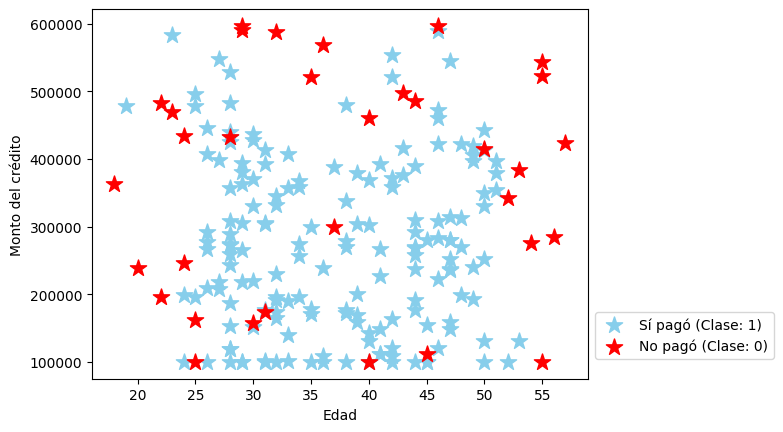

In [25]:
plt.scatter(buenos ["edad"], buenos ["credito"],
            marker="*", s = 150, color="skyblue",
            label="Sí pagó (Clase: 1)")
plt.scatter(malos ["edad"], malos ["credito"],
            marker="*", s = 150, color="red",
label="No pagó (Clase: 0)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend (bbox_to_anchor=(1, 0.2))
plt.show()

Preparacion de los datos(escalar)

In [26]:
datos=clientes [["edad", "credito"]]
clase =clientes["cumplio"]
escalador =preprocessing. MinMaxScaler()
datos =escalador.fit_transform(datos)
datos

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

Creacion del modelo knn

valor de K

In [27]:
clasificador= KNeighborsClassifier(n_neighbors=3)
clasificador.fit(datos, clase)


KNeighborsClassifier(n_neighbors=3)

Nueva solicitante(clasificacion)

clase [1]
Probabilidad por clase [[0. 1.]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


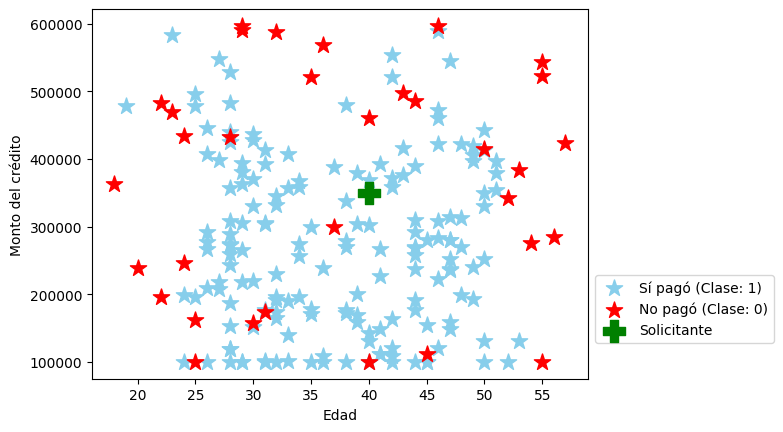

In [28]:
edad=40
monto=350000

#Escalar Los datos del nuevo solicitante
solicitante=escalador.transform([[edad, monto]])
print("clase",clasificador.predict(solicitante))
print("Probabilidad por clase",clasificador.predict_proba(solicitante))

#Calcular clase y probabilidades
#Código para graficar
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s = 150, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s = 150, color="red", label="No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s = 250, color="green", label="Solicitante")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

Regiones de las clases

pagadores deudores


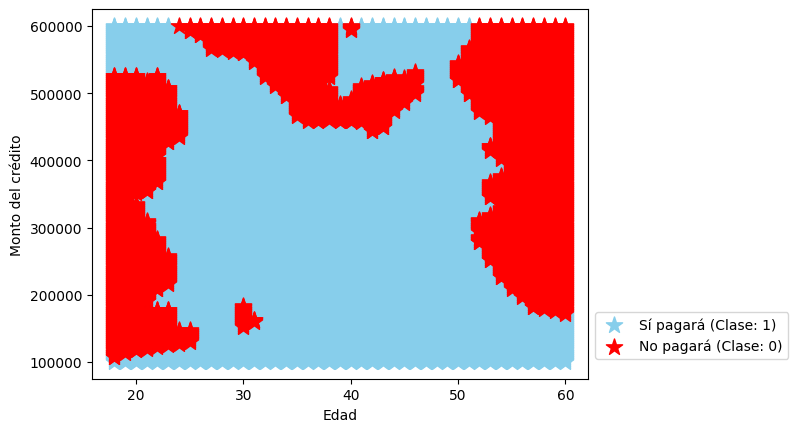

In [29]:
#Datos sinténticos de todos los posibles solicitantes
creditos =np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades =np.repeat(np.arange(18, 61), len(np.arange(100000, 600010, 1000))).reshape(1, -1)
todos = pd.DataFrame (np.stack((edades, creditos), axis=2)[0],
columns=["edad", "credito"])
#Escalar Los datos
solicitantes =escalador.transform(todos)
#Predecir todas las clases
clases_resultantes =clasificador.predict(solicitantes)
#Código para graficar

buenos =todos [clases_resultantes==1]
malos = todos [clases_resultantes==0]
plt.scatter(buenos ["edad"], buenos ["credito"],
marker="*", s = 150, color="skyblue", label="Sí pagará (Clase: 1)")
plt.scatter(malos ["edad"], malos ["credito"],
marker="*", s=150, color="red", label="No pagará (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

In [30]:
# División de datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(datos, clase, test_size=0.3, random_state=42)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier



# Lista de métricas a evaluar
metricas = ['manhattan', 'minkowski', 'hamming']

resultados = {}

for m in metricas:
    modelo = KNeighborsClassifier(n_neighbors=3, metric=m)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Guardamos resultados
    resultados[m] = {
        'confusion': confusion_matrix(y_test, y_pred),
        'reporte': classification_report(y_test, y_pred, output_dict=True)
    }

# Mostrar resultados
for m in metricas:
    print(f"\n🔸 MÉTRICA: {m.upper()}")
    print("Matriz de confusión:\n", resultados[m]['confusion'])
    print("Reporte de clasificación:")
    print(classification_report(y_test,
                                KNeighborsClassifier(n_neighbors=3, metric=m)
                                .fit(X_train, y_train)
                                .predict(X_test)))



🔸 MÉTRICA: MANHATTAN
Matriz de confusión:
 [[ 3  6]
 [ 0 51]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.89      1.00      0.94        51

    accuracy                           0.90        60
   macro avg       0.95      0.67      0.72        60
weighted avg       0.91      0.90      0.88        60


🔸 MÉTRICA: MINKOWSKI
Matriz de confusión:
 [[ 3  6]
 [ 0 51]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.89      1.00      0.94        51

    accuracy                           0.90        60
   macro avg       0.95      0.67      0.72        60
weighted avg       0.91      0.90      0.88        60


🔸 MÉTRICA: HAMMING
Matriz de confusión:
 [[ 1  8]
 [ 3 48]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.25   

In [32]:
# Determinar el mejor modelo según F1 promedio
mejor_metrica = None
mejor_f1 = 0

for m in metricas:
    f1_promedio = resultados[m]['reporte']['weighted avg']['f1-score']
    print(f"Métrica: {m} -> F1 promedio: {f1_promedio:.3f}")
    if f1_promedio > mejor_f1:
        mejor_f1 = f1_promedio
        mejor_metrica = m

print(f"\n✅ El mejor modelo usa la métrica: {mejor_metrica.upper()} con F1 promedio = {mejor_f1:.3f}")


Métrica: manhattan -> F1 promedio: 0.878
Métrica: minkowski -> F1 promedio: 0.878
Métrica: hamming -> F1 promedio: 0.786

✅ El mejor modelo usa la métrica: MANHATTAN con F1 promedio = 0.878


k = 1 → Precisión: 0.850
k = 3 → Precisión: 0.900
k = 5 → Precisión: 0.883
k = 7 → Precisión: 0.850
k = 14 → Precisión: 0.850


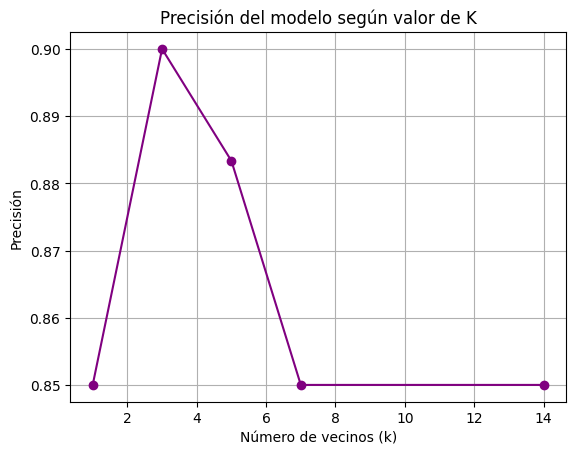

In [33]:
from math import sqrt

valores_k = [1, 3, 5, 7, int(sqrt(len(clientes)))]
precisiones = {}

for k in valores_k:
    modelo = KNeighborsClassifier(n_neighbors=k, metric=mejor_metrica)
    modelo.fit(X_train, y_train)
    acc = modelo.score(X_test, y_test)
    precisiones[k] = acc
    print(f"k = {k} → Precisión: {acc:.3f}")

plt.plot(valores_k, list(precisiones.values()), marker='o', color='purple')
plt.title("Precisión del modelo según valor de K")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()
